In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the Fuji elevation data
csv_path = "mtfuji_data.csv"
np.set_printoptions(suppress=True)  # Prevent scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Extract relevant columns
point_numbers = fuji[:, 0]
elevations = fuji[:, 3]

In [2]:
# Problem 1: Data visualization
def visualize_elevation_data():
    plt.figure(figsize=(12, 6))
    plt.plot(point_numbers, elevations)
    plt.title("Mt. Fuji Elevation Cross-Section")
    plt.xlabel("Point Number")
    plt.ylabel("Elevation (m)")
    plt.grid(True)
    plt.show()

In [3]:
# Problem 2: Calculate gradient at a certain point
def calculate_gradient(current_point):
    if current_point <= 0 or current_point >= len(point_numbers) - 1:
        return 0  # Edge case: return 0 gradient
    
    # Calculate gradient between current point and the previous point
    current_elevation = elevations[current_point]
    previous_elevation = elevations[current_point - 1]
    
    # Calculate gradient (change in elevation / change in point number)
    gradient = (current_elevation - previous_elevation) / 1
    
    return gradient

In [4]:
# Problem 3: Calculate the destination point
def calculate_destination(current_point, learning_rate=0.2):
    # Get gradient at current point
    gradient = calculate_gradient(current_point)
    
    # Calculate destination point: current point - learning_rate * gradient
    destination_float = current_point - learning_rate * gradient
    
    # Round to get nearest integer point
    destination = round(destination_float)
    
    # Handle edge cases
    if destination < 0:
        destination = 0
    elif destination >= len(point_numbers):
        destination = len(point_numbers) - 1
        
    return destination
    

In [5]:
# Problem 4: Create a function to descend the mountain
def descend_mountain(initial_point, learning_rate=0.2, max_iterations=1000):
    path = [initial_point]
    current_point = initial_point
    
    for _ in range(max_iterations):
        next_point = calculate_destination(current_point, learning_rate)
        
        # Stop if we've reached a local minimum (next point is the same as current)
        if next_point == current_point:
            break
            
        path.append(next_point)
        current_point = next_point
    
    return path


In [6]:
# Problem 5: Visualize the descent process
def visualize_descent(path):
    # Get elevations for each point in the path
    path_elevations = [elevations[p] for p in path]
    
    # Get gradients for each point in the path
    path_gradients = [calculate_gradient(p) for p in path]
    
    # Create figure with 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
    
    # Plot 1: Cross-section with path
    ax1.plot(point_numbers, elevations, 'b-', label='Elevation Profile')
    ax1.scatter([point_numbers[p] for p in path], path_elevations, color='red', label='Descent Path')
    ax1.set_title('Mt. Fuji Elevation Cross-Section with Descent Path')
    ax1.set_xlabel('Point Number')
    ax1.set_ylabel('Elevation (m)')
    ax1.grid(True)
    ax1.legend()
    
    # Plot 2: Elevation for each iteration
    ax2.plot(range(len(path)), path_elevations, 'g-o')
    ax2.set_title('Elevation vs. Iteration')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Elevation (m)')
    ax2.grid(True)
    
    # Plot 3: Gradient for each iteration
    ax3.plot(range(len(path)), path_gradients, 'r-o')
    ax3.set_title('Gradient vs. Iteration')
    ax3.set_xlabel('Iteration')
    ax3.set_ylabel('Gradient')
    ax3.grid(True)
    
    plt.tight_layout()
    plt.show()


In [7]:
# Problem 6: Function to handle multiple initial points
def descend_from_multiple_points(initial_points, learning_rate=0.2):
    all_paths = []
    for point in initial_points:
        path = descend_mountain(point, learning_rate)
        all_paths.append(path)
    return all_paths

In [11]:
# Problem 7: Visualize descent for multiple initial points
def visualize_multiple_descents(all_paths):
    plt.figure(figsize=(12, 6))
    
    # Plot full elevation profile
    plt.plot(point_numbers, elevations, 'b-', label='Elevation Profile')
    
    # Plot each path with different colors
    colors = ['red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive']
    
    for i, path in enumerate(all_paths):
        color = colors[i % len(colors)]
        path_elevations = [elevations[p] for p in path]
        plt.scatter([point_numbers[p] for p in path], path_elevations, color=color, 
                   label=f'Path from point {path[0]}')
    
    plt.title('Mt. Fuji Elevation Cross-Section with Multiple Descent Paths')
    plt.xlabel('Point Number')
    plt.ylabel('Elevation (m)')
    plt.grid(True)
    plt.legend()
    plt.show()

In [12]:
# Problem 8: Compare different learning rates
def compare_learning_rates(initial_point, learning_rates):
    all_paths = []
    for lr in learning_rates:
        path = descend_mountain(initial_point, learning_rate=lr)
        all_paths.append((lr, path))
    
    plt.figure(figsize=(12, 6))
    
    # Plot full elevation profile
    plt.plot(point_numbers, elevations, 'b-', label='Elevation Profile')
    
    # Plot each path with different colors
    colors = ['red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive']
    
    for i, (lr, path) in enumerate(all_paths):
        color = colors[i % len(colors)]
        path_elevations = [elevations[p] for p in path]
        plt.scatter([point_numbers[p] for p in path], path_elevations, color=color, 
                   label=f'Learning rate: {lr}')
    
    plt.title(f'Mt. Fuji Descent Paths with Different Learning Rates (Initial Point: {initial_point})')
    plt.xlabel('Point Number')
    plt.ylabel('Elevation (m)')
    plt.grid(True)
    plt.legend()
    plt.show()

In [13]:
#Execution


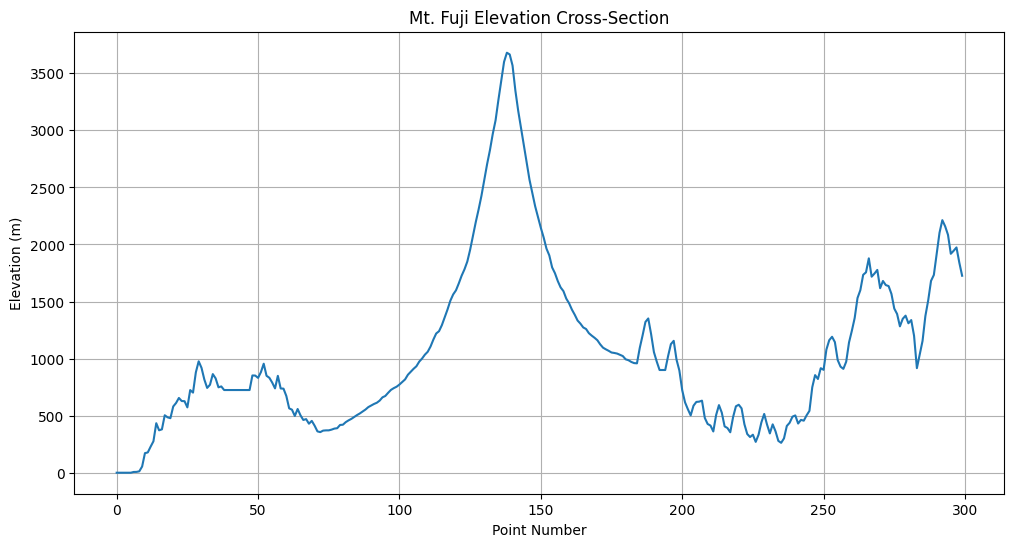

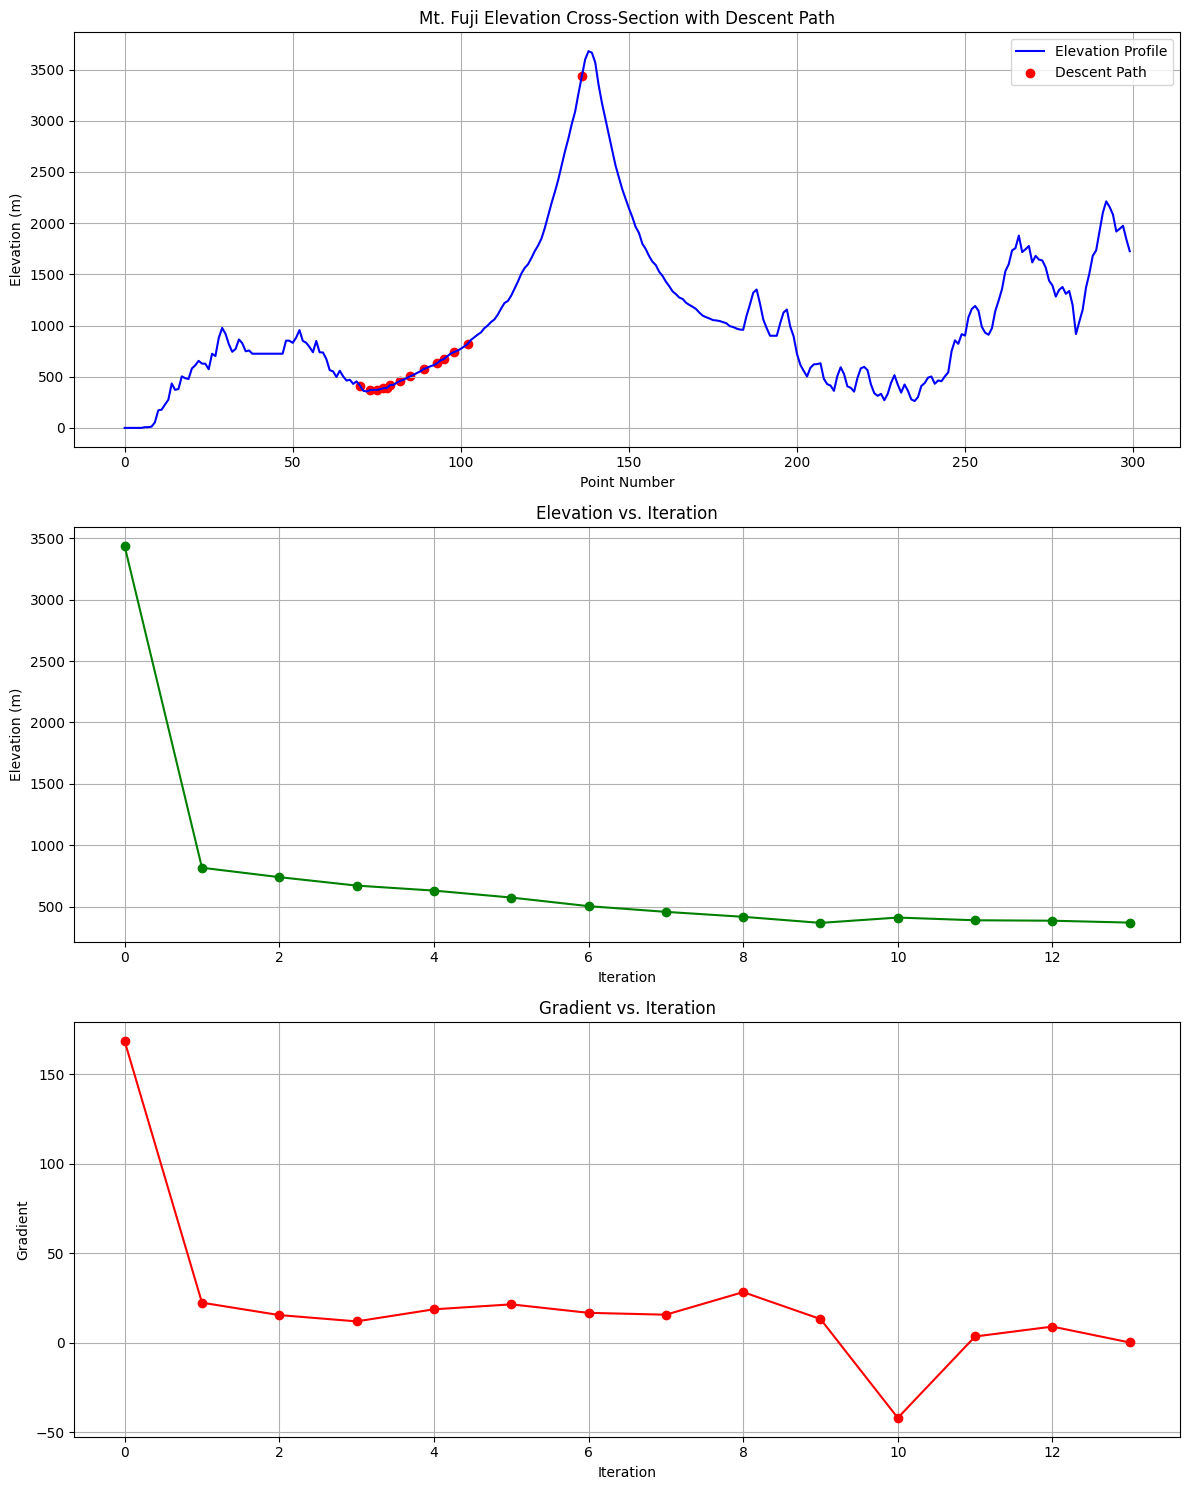

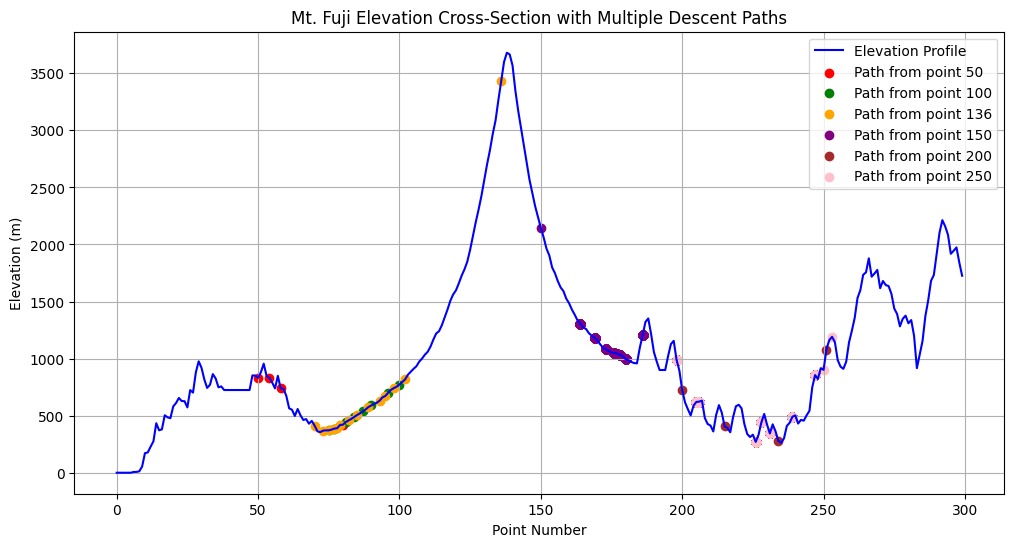

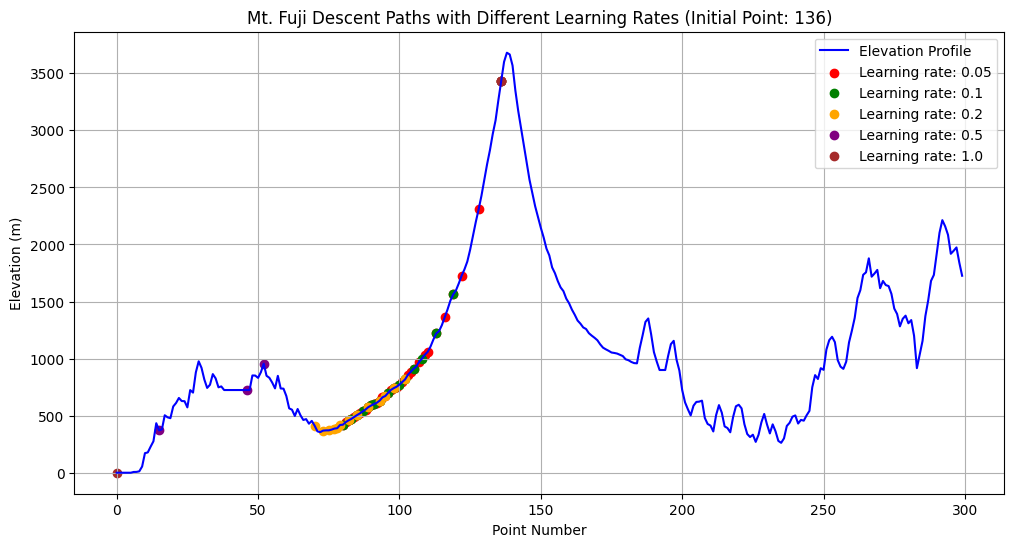

In [14]:
if __name__ == "__main__":
    # Problem 1: Visualize elevation data
    visualize_elevation_data()
    
    # Problem 4 & 5: Descend from summit (point 136)
    summit_path = descend_mountain(136)
    visualize_descent(summit_path)
    
    # Problem 6 & 7: Descend from multiple initial points
    initial_points = [50, 100, 136, 150, 200, 250]
    all_paths = descend_from_multiple_points(initial_points)
    visualize_multiple_descents(all_paths)
    
    # Problem 8: Compare different learning rates
    learning_rates = [0.05, 0.1, 0.2, 0.5, 1.0]
    compare_learning_rates(136, learning_rates)